In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.neighbors import KNeighborsClassifier
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
#validamos si los datos son correctos, viendo su la suma de los aguacates y las bolsas corresponden
#con los datos
dfIncorrecta = df[((df['4046'] + df['4225'] + df['4770'] + df['Total Bags']) 
!= df['Total Volume'] ) | ((df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']) 
!= df['Total Bags'] )]
dfCorrecta =  df[((df['4046'] + df['4225'] + df['4770'] + df['Total Bags']) 
== df['Total Volume'] ) & ((df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']) 
== df['Total Bags'] )]
dfIncorrecta.reset_index(inplace = True)
dfCorrecta.reset_index(inplace = True)

print("Total",df.shape)
print("Incorrecta",dfIncorrecta.shape)
print("Correcta",dfCorrecta.shape)

Total (18249, 14)
Incorrecta (8143, 15)
Correcta (10106, 15)


In [ ]:
#revisamos si despues de la separacion quedo algun valor nulo
dfCorrecta.isnull().sum()

index           0
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



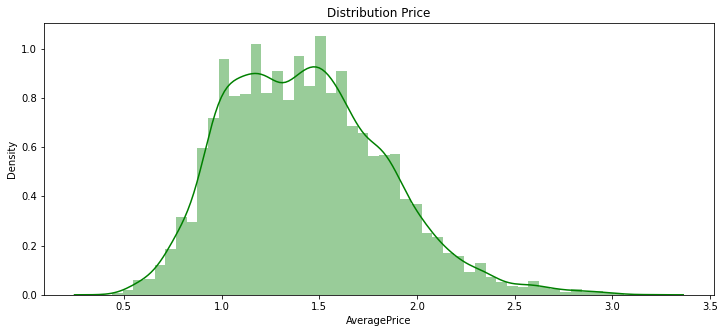

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(dfCorrecta["AveragePrice"], color = 'g')

In [ ]:
conventional = dfCorrecta[dfCorrecta.type=="conventional"]
organic = dfCorrecta[dfCorrecta.type=="organic"]

groupBy1_price = conventional.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")

groupBy2_price = organic.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [ ]:
dfCorrecta['type'].value_counts()

organic         5540
conventional    4566
Name: type, dtype: int64

In [ ]:
#quitamos columnas que no nos serviran
dfCorrecta = dfCorrecta.drop('region', 1)
dfCorrecta = dfCorrecta.drop('index', 1)
dfCorrecta = dfCorrecta.drop('Unnamed: 0', 1)

<ipython-input-17-123f8d53dff6>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

<ipython-input-17-123f8d53dff6>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

<ipython-input-17-123f8d53dff6>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
#convertimos a numerica la variable categorica
dfCorrecta = pd.get_dummies(data=dfCorrecta, columns=['type'])

In [ ]:
dfCorrecta


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,0
1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,0
2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,0
3,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,1,0
4,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10101,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,2018,0,1
10102,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,2018,0,1
10103,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,2018,0,1
10104,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,0,1


In [ ]:
X = pd.DataFrame(index=dfCorrecta.index)
Y = pd.DataFrame(index=dfCorrecta.index)
X = dfCorrecta
Y = dfCorrecta['AveragePrice']

In [ ]:
X = X.drop(['year'],axis=1)
X = X.drop(['Date'], axis=1)
X = X.drop(['AveragePrice'],axis=1)

In [ ]:
X.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,0
1,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,0
2,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,0
3,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,1,0
4,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8084, 10) (8084,)
(2022, 10) (2022,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 4)

KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
predictions = KNN.predict(X_test)

,Y Test,Pred
7767,1.14,1.4000
4947,1.34,1.3650
2582,1.02,1.1850
9845,2.03,1.8625
5714,1.63,1.5375


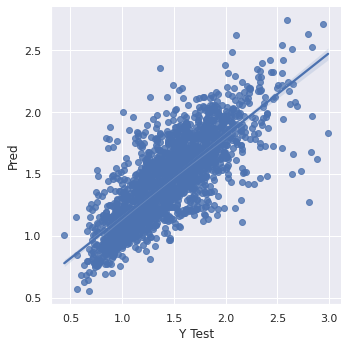

In [ ]:
sns.set(font_scale = 1)
data = pd.DataFrame({'Y Test':y_test , 'Pred':predictions},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()